Handwritten Digit Recognition using neural networks

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Load Dataset:

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 

In [91]:
len(X_train)

(28, 28)

In [92]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

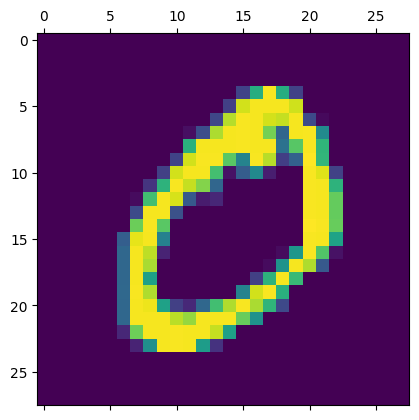

In [93]:
plt.matshow(X_train[1])

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2166 - accuracy: 0.7084
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5045 - accuracy: 0.8703
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3919 - accuracy: 0.8930
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3481 - accuracy: 0.9025
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3238 - accuracy: 0.9077


In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 739us/step - loss: 0.3040 - accuracy: 0.9125


[0.3039579391479492, 0.9125000238418579]

In [70]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 627us/step


array([6.0640341e-01, 1.2756858e-02, 9.9805701e-01, 9.3112701e-01,
       5.9676927e-06, 5.1017356e-01, 8.7089479e-01, 7.3763943e-07,
       5.1283860e-01, 4.9428454e-06], dtype=float32)

In [55]:
np.argmax(y_predicted[1])

2

In [73]:
y_predicted_labels = [np.argmax(i) for i in  y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [79]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)


Text(95.72222222222221, 0.5, 'Truth')

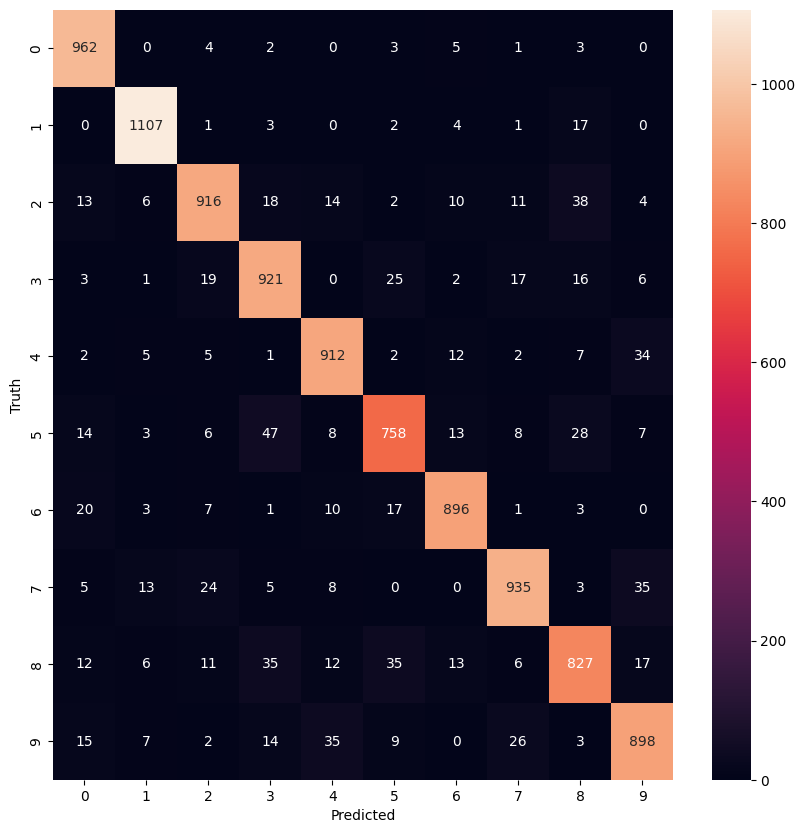

In [82]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')